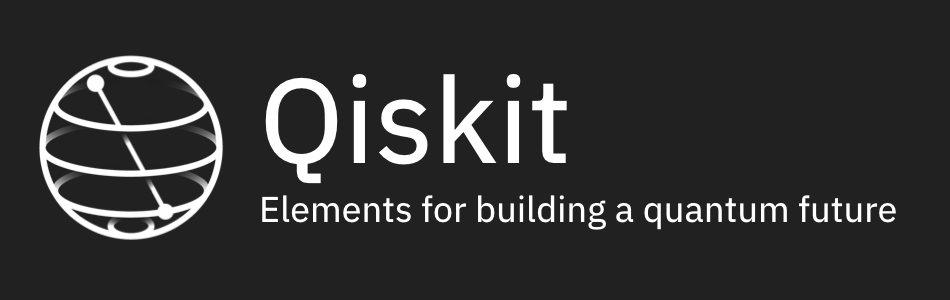

<div class="alert alert-block alert-info">
    <b>Important:</b> This notebook uses <code>ipywidgets</code> that take advantage of the javascript interface in a web browser.  The downside is the functionality does not render well on saved notebooks.  Run this notebook locally to see the widgets in action.
</div>

# Qiskit Jupyter Tools

Qiskit was designed to be used inside of the Jupyter notebook interface.  As such it includes many useful routines that take advantage of this platform, and make performing tasks like exploring devices and tracking job progress effortless.

Loading all the qiskit Jupyter goodness is done via:

In [1]:
from qiskit import *
import qiskit.tools.jupyter  # This is the where the magic happens (literally).

## Table of contents

1) [Automatic Job Tracking](#tracking)


2) [Backend Details](#details)


3) [Overview of Backends](#overview)


In [2]:
IBMQ.load_account();

In [3]:
provider = IBMQ.get_provider(group='open')

## Automatic Job Tracking <a name="tracking"></a>

Perhaps the most useful Jupyter tool is the `job_watcher`.  Once loaded, this widget automatically tracks the jobs submitted by the user, and displays this information in a window floating in the upper left corner of the notebook.  

To start the monitor you run the Jupyter magic:

In [4]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

You should now see a small window titled "IBMQ Jobs" in the upper left corner of the notebook.

Now, let's submit a job to a device:

In [5]:
backend = provider.get_backend('ibmq_essex')

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

job = execute(qc, backend)

Opening the job watcher you will see that the job has been added to the list of jobs, and its status and queue position (if any) are being automatically tracked and updated.  If you want to kill the job watcher you can do so by calling:

In [6]:
%qiskit_disable_job_watcher

Although the watcher itself is killed, the underlying framework is still tracking jobs for you and will show this information if loaded once again.

## Viewing Backend Details <a name="details"></a>

The IBM Q devices contain a large amount of configuration data and properties.  This information can be retrieved by calling:

In [7]:
config = backend.configuration()
params = backend.properties()

However, parsing through this information quickly becomes tedious.  Instead, all the information for a single backend can be displayed graphically by just calling the backend instance itself:

In [8]:
backend

<IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>

This widget displays all the information about a backend in a single tabbed-window.

## Getting an Overview of Backends <a name="overview"></a>

Instead of a single backend, you may be interested in seeing all the backends at once to compare, for example, average CNOT error rates.  This is done using the `backend_overview` widget:

In [9]:
%qiskit_backend_overview

In addition to showing all the backends that the user has access to, the number of pending jobs on the devices is continuously being updated along with the operational status and least busy selection.

In [9]:
%qiskit_version_table
%qiskit_copyright